[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/15LvpZEaXO94PAzF55jHrZagEtm6hsB38?usp=sharing)

# Why do we need geometric numerical methods?

We have seen that "classical" Runge-Kutta methods are not so hard to define. Furthermore, one can define Runge-Kutta methods that are accurate to any desired order. Why do we even need to look into other methods or select particular families of Runge-Kutta methods for some problems?

Sometimes one is not just interested in producing an accurate approximate solution, but also in reproducing a known qualitiative property of the target solution. We will soon see some of these properties worth preserving in more detail, but a typical example we can think of is energy preservation. There are several dynamical system that admit a conservation law, and it could happen that not reproducing such a conservation law discretely leads to solutions that are not interpretable or reliable.

The methods that are built to preserve some known property of the target solution are called **geometric** or **structure-preserving**.

We will explore in quite some detail methods that
- preserve an energy function,
- preserve the canonical symplectic form of $\mathbb{R}^{2d}$,
- preserve the non-expansive nature of the approximated solutions.

First, let us look at what happens when we approximate the solutions of the simple harmonic oscillator with the explicit Euler method.

Let us consider the second-order differential equation $\ddot{x}(t) = -x(t)$, which can be rewritten as
$$
\begin{cases}
\dot{x}(t) = v(t) \\
\dot{v}(t) = -x(t).
\end{cases}
$$
This system conserves the mechanical energy $E(x,v)=\frac{x^2+v^2}{2}$ since
$$
\frac{d}{dt}E(x(t),v(t))=x(t)\dot{x}(t)+v(t)\dot{v}(t) = x(t)v(t)-v(t)x(t)=0.
$$
Let us apply the explicit Euler method to this equation and see how the energy $E$ changes:
$$
x_{n+1} = x_n + h \, v_n,\\
v_{n+1} = v_n - h \, x_n.
$$
If we compute $E(x_{n+1},v_{n+1})$ we find
$$
\begin{split}
E(x_{n+1},v_{n+1}) &= \frac{1}{2}\left(x_n^2+v_n^2 + h^2(x_n^2+v_n^2) +2hx_nv_n - 2h v_nx_n\right)\\
&=E(x_n,v_n) + h^2\,E(x_n,v_n) = (1+h^2)E(x_n,v_n)>E(x_n,v_n).
\end{split}
$$

Thus, we see that the Hamiltonian energy is not conserved by the explicit Euler method, but is increased at each and every step. Moreover, the extent to which it is changed depends on the local truncation error of the method, since it is proportional to $h^2$. 

This fact that a smooth enough first integral $E:\mathbb{R}^d\to\mathbb{R}$ of the vector field $\mathcal{F}\in\mathfrak{X}(\mathbb{R}^d)$ is preserved up to the local truncation error by a one-step method is true in general. In fact,
$$
E(\mathbf{x}_n)=E(\phi^{h}_{\mathcal{F}}(\mathbf{x}_n)) = E(\varphi^{h}_{\mathcal{F}}(\mathbf{x}_n) + \mathcal{O}(h^{p+1})) = E(\varphi^{h}_{\mathcal{F}}(\mathbf{x}_n)) + \mathcal{O}(h^{p+1}).
$$

**EXERCISE** Repeat this calculation with the implicit Euler method, defined as $$\mathbf{x}_{n+1} = \mathbf{x}_n + h\mathcal{F}(\mathbf{x}_{n+1}).$$ 

Let us now check what happens with some other methods with a numerical experiment. We will see why some methods behave better than others in the upcoming parts of the course.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scripts.integrators import *
from scripts.plotting import get_plots

In [2]:
def vecField(t,y):
    #Dynamics of the simple Harmonic Oscillator
    if len(y.shape)==1:
        return np.array([y[1],-y[0]])
    elif len(y.shape)==2:    
        assert y.shape[0]==2
        return np.concatenate((y[1:2],-y[0:1]),axis=0)

In [3]:
t0 = 0.
tmax = 40
N = 1000
t_eval = np.linspace(t0,tmax,N)
y0 = np.array([1.,0.])

solnEE = integrate_with_explicit_euler(y0,vecField,t_eval) #Solution with Explicit Euler
solnIE = integrate_with_implicit_euler(y0,vecField,t_eval) #Solution with Implicit Euler
solnRK45 = integrate_with_rk45(y0,vecField,t_eval,tol=1e-2) #Solution with RK45
solnIMP = integrate_with_implicit_midpoint(y0,vecField,t_eval) #Solution with Implicit Midpoint

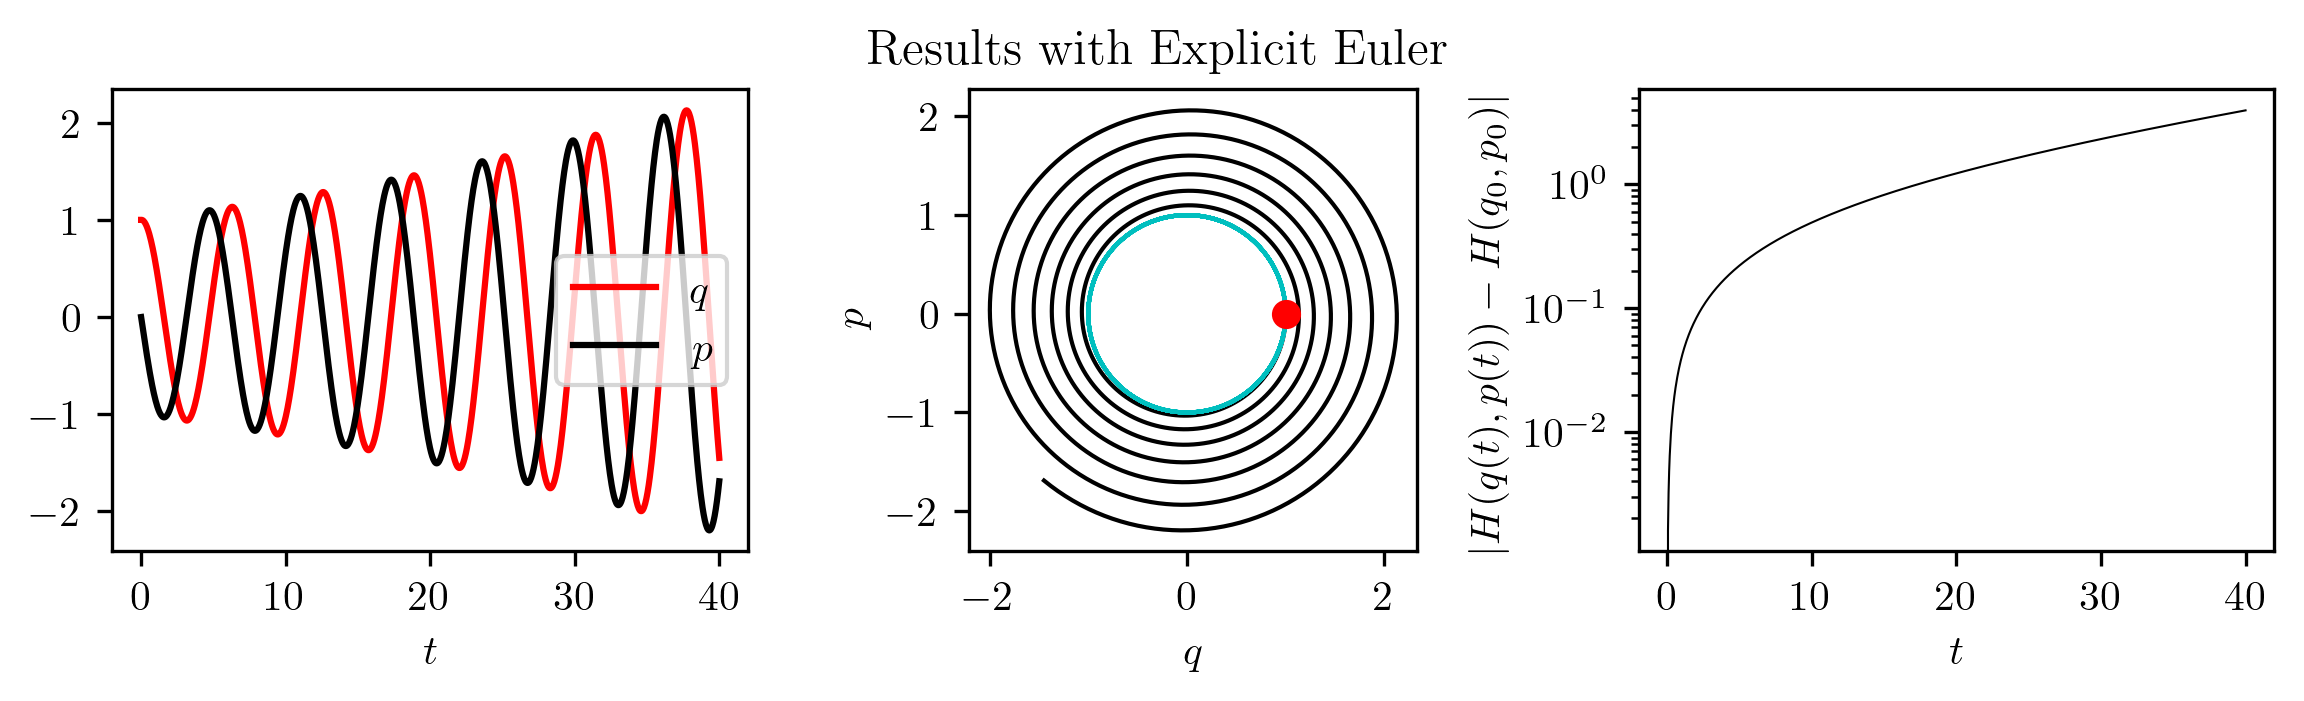

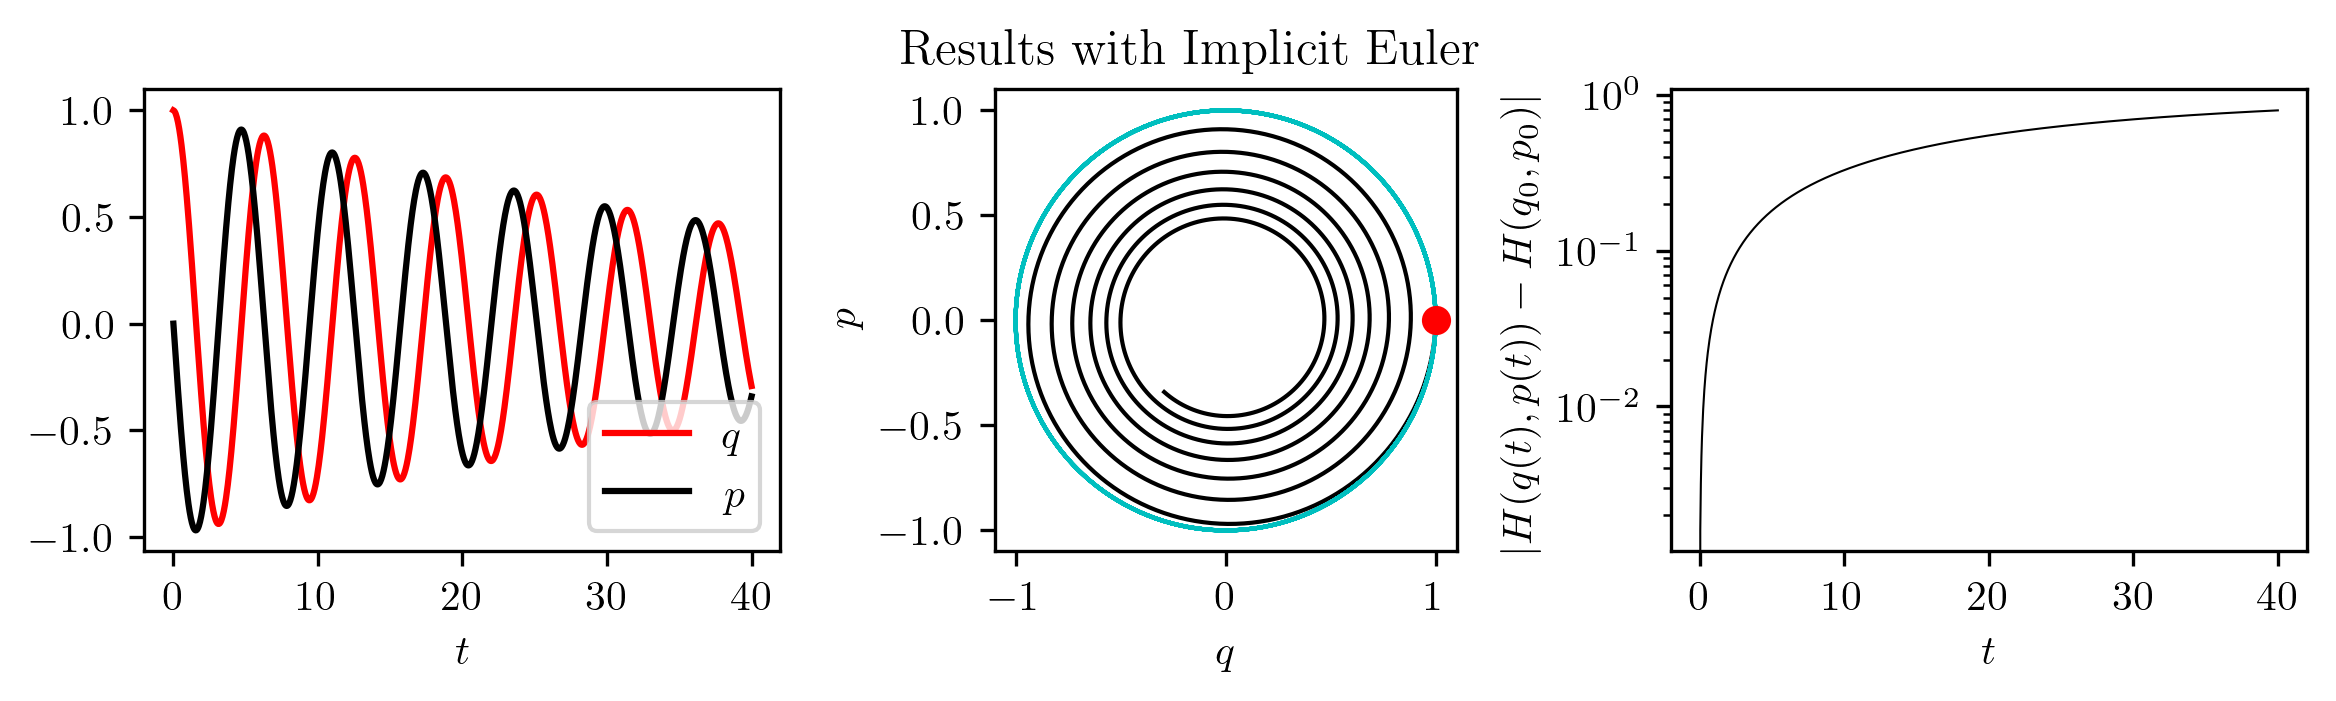

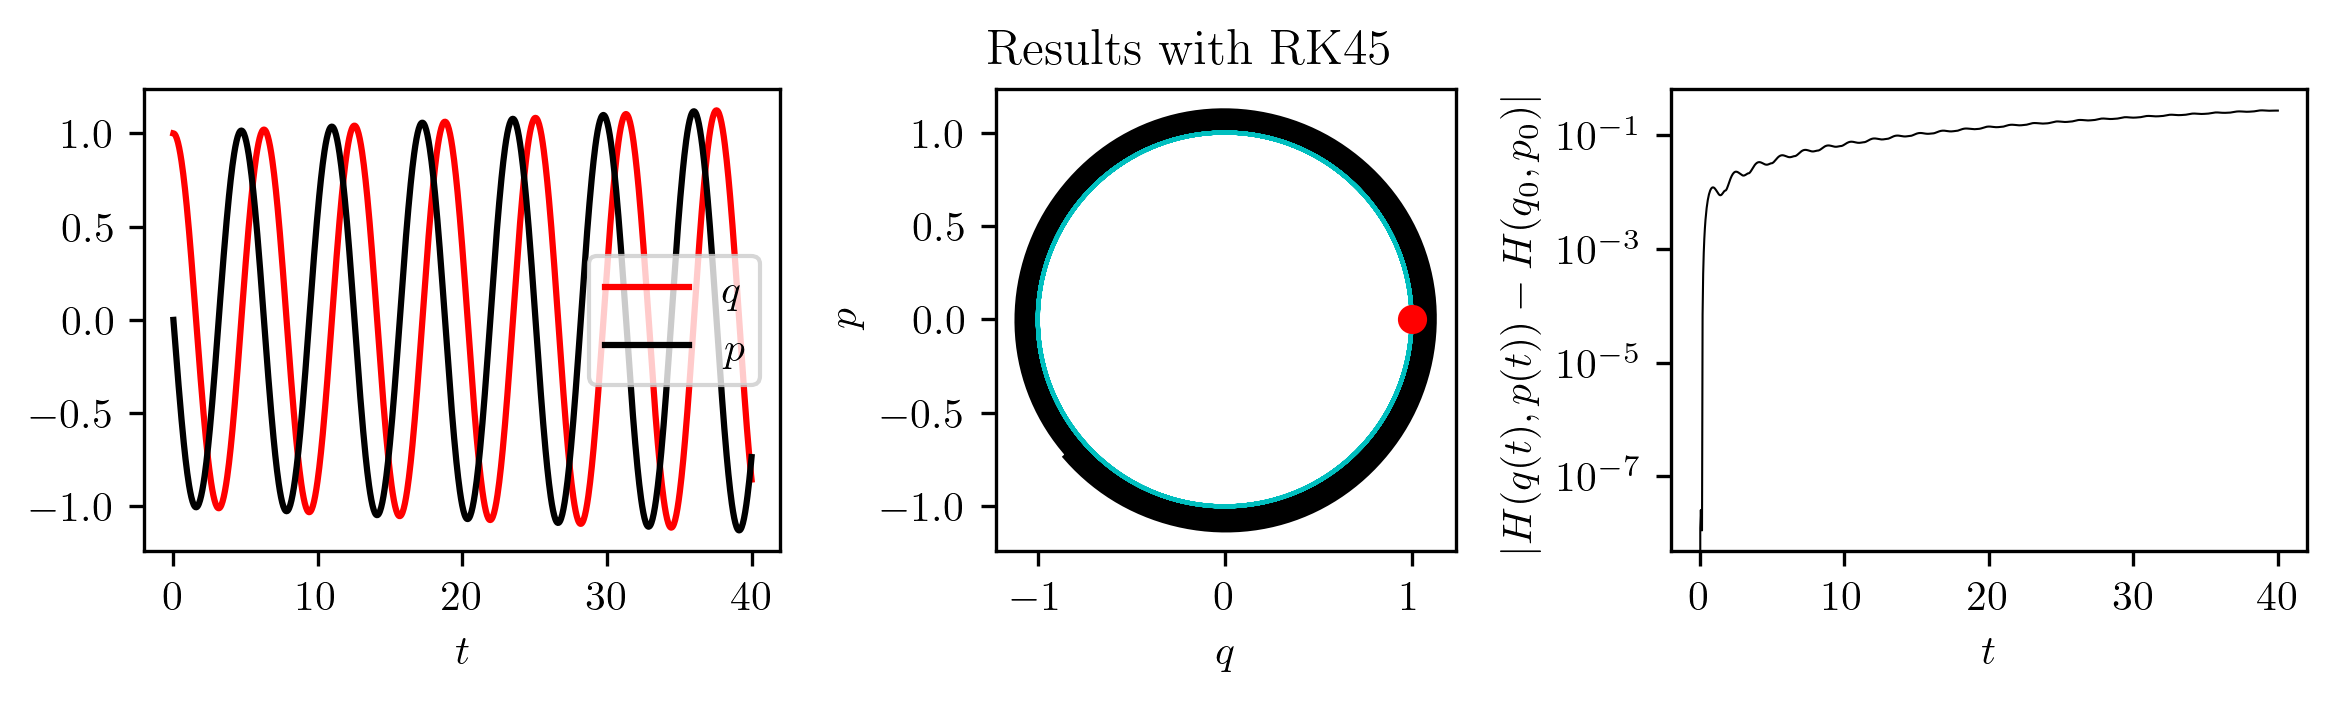

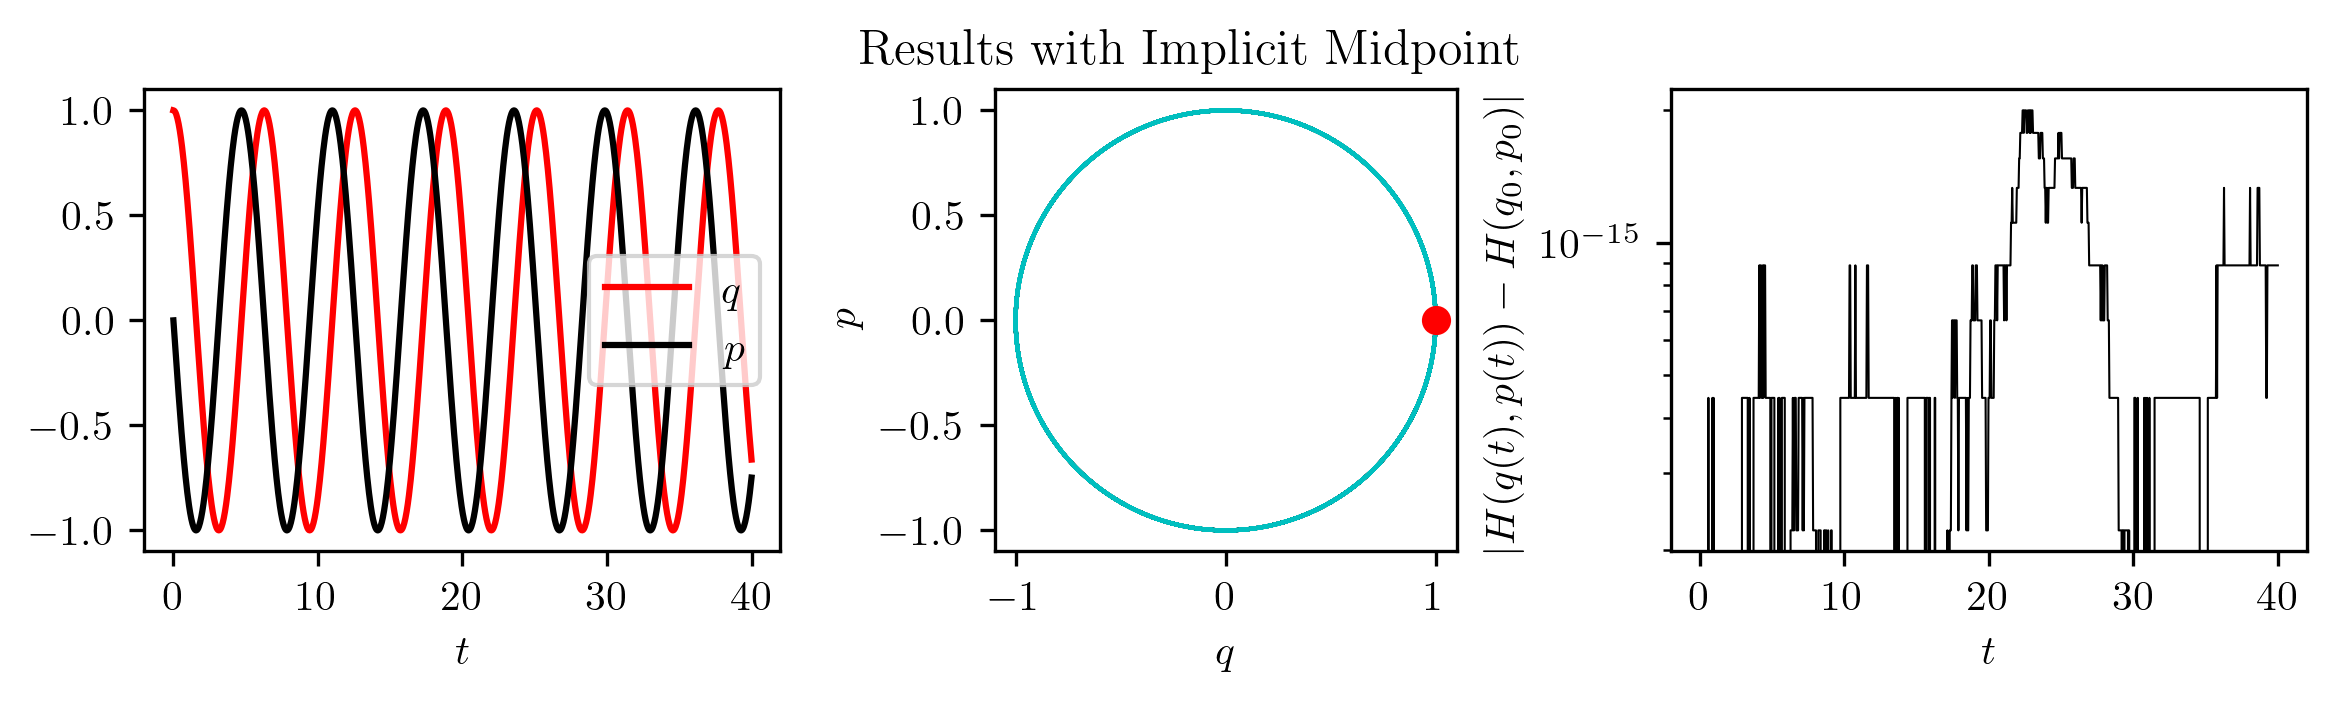

In [4]:
get_plots(solnEE,t_eval,method="Explicit Euler")
get_plots(solnIE,t_eval,method="Implicit Euler")
get_plots(solnRK45,t_eval,method="RK45")
get_plots(solnIMP,t_eval,method="Implicit Midpoint")